# Problem Set 4
## Fundamentals of Simulation Methods, WiSe 20/21

#### Author:    Elias Olofsson

#### Version information:
        2020-12-02: v.1.0. First public release. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
import pandas as pd

## Exercise 1 - The 2-body problem: Orbit of planet around the Sun (8 pts)

In [2]:
# Constants
M_solar = 1.99 * 10**30     # Solar mass                (kg)
AU = 1.496 * 10**11         # Astronomical unit         (m)
AU_v = 2.98 * 10**4         # Kepler velocity           (m/s)    
G = 6.673 * 10**-11         # Gravitational constant    (m^3*kg^-1*s^-2)

# System parameters
M_s = M_solar*1                         # Mass of star
M_p =  M_solar*10**-3                   # Mass of planet

# Initial conditions
x_p_init = np.array([1,0,0])*AU         # Planet position
v_p_init = np.array([0,0.5,0.1])*AU_v     # Planet velocity

x_s_init = np.array([0,0,0])*AU         # Star position
v_s_init = np.array([0,0,0])*AU_v       # Star velocity

In [3]:
# Vector-valued function from our ODE (Hardcoded for 2 bodies, only affected by gravity)
def f(x):
    r = np.linalg.norm(x[0,:]-x[1,:])
    v_next = np.zeros_like(x)
    v_next[0,:] = G*M_s*(x[1,:]-x[0,:])/r**3
    v_next[1,:] = G*M_p*(x[0,:]-x[1,:])/r**3
    return v_next

#### Integration using the leapfrog algorithm

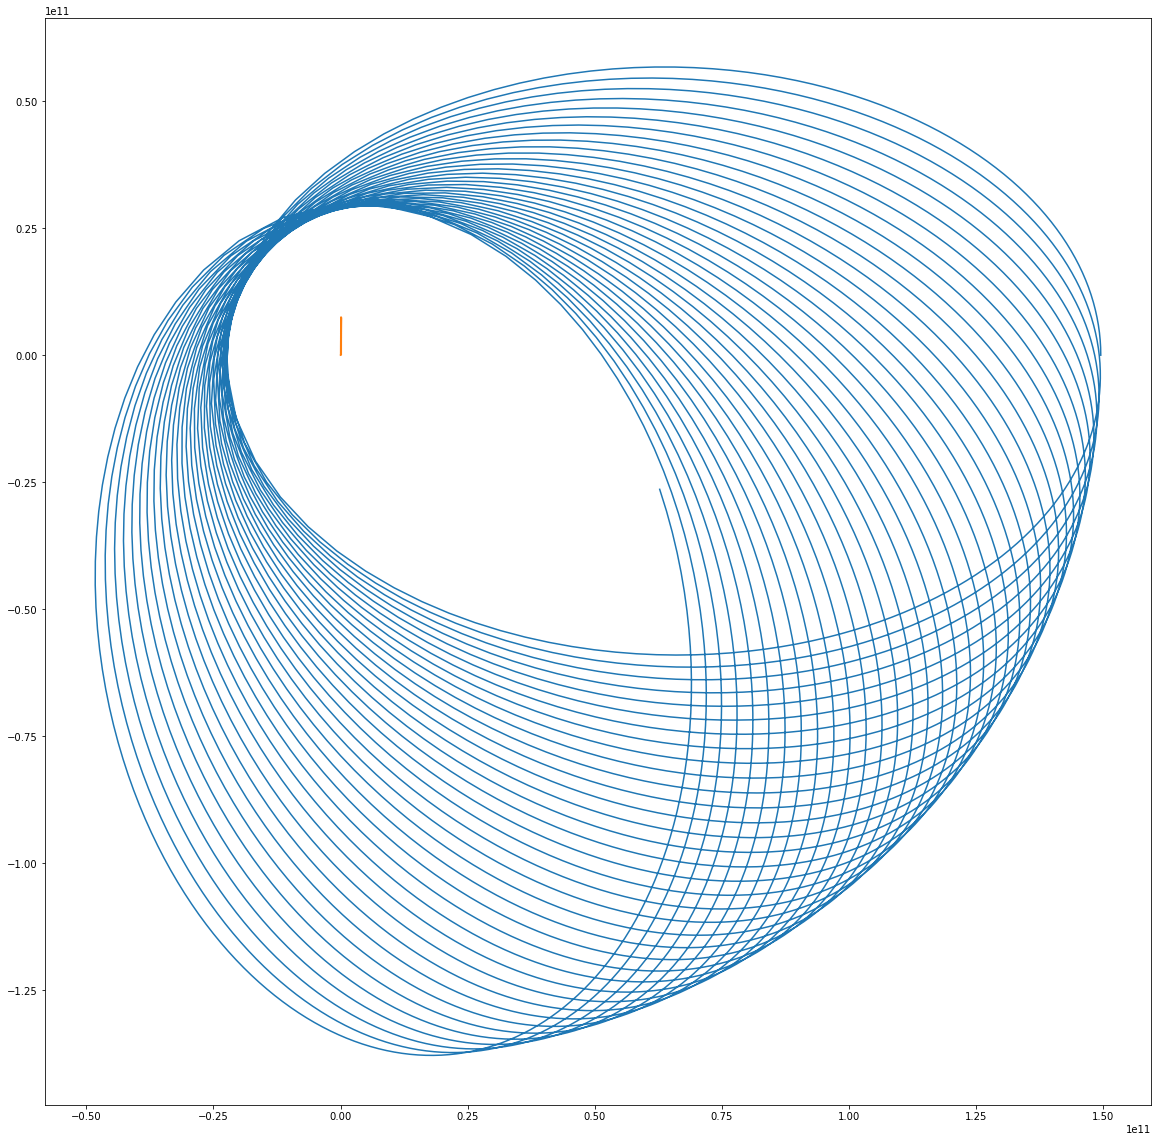

In [4]:
# Simulation settings
dt = 10**5          # Stepsize 
N = 5*10**3         # No. of timesteps

N_bodies = 2        # No. of bodies
dimensions = 3      # No. of dimensions

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert initial values.
x[0,:,:] =  x_p_init, x_s_init
v[0,:,:] =  v_p_init, v_s_init

data = []
# Leapfrog integration
for i in range(N-1):
    v_half = v[i] + dt/2*f(x[i])        # Halfstep in v.
    x[i+1] = x[i] + dt*v_half           # Step in x, using halfstep in v.
    v[i+1] = v_half + dt/2*f(x[i+1])    # Step in v, using halfstep in v and next step in x.

    for j in range(N_bodies):
        data.append({
            "body": j,
            "x": x[i+1,j,0],
            "y": x[i+1,j,1],
            "z": x[i+1,j,2],
        })
df = pd.DataFrame(data)

# Plotting (2D)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.plot(x[:,0,0],x[:,0,1])
ax.plot(x[:,1,0],x[:,1,1])
ax.set_aspect(aspect=1)
plt.show()

Text(0.5, 0, 'z')

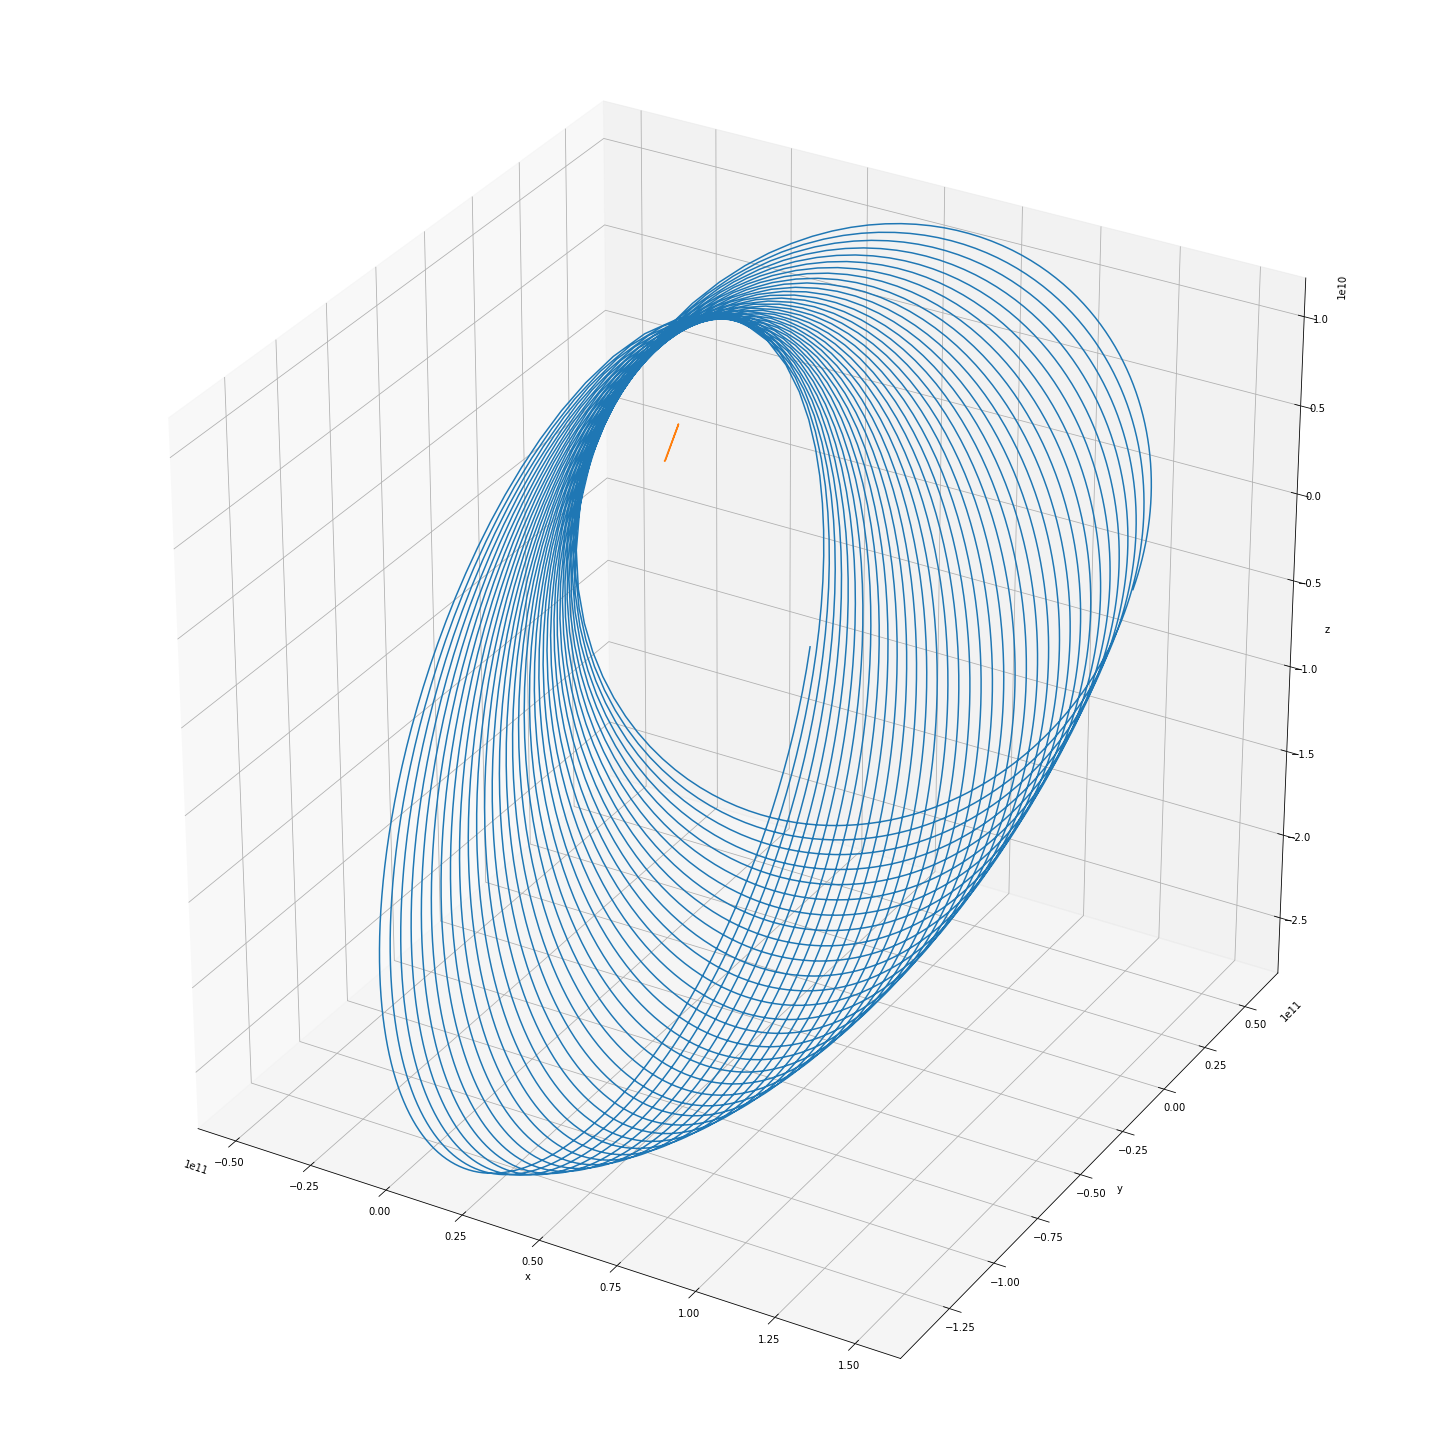

In [5]:
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
ax.plot(x[:,0,0], x[:,0,1], x[:,0,2])
ax.plot(x[:,1,0], x[:,1,1], x[:,1,2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


In [6]:
fig = px.line_3d(df, x="x", y="y", z="z", color="body", width = 800, height = 800)
fig.show()